In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

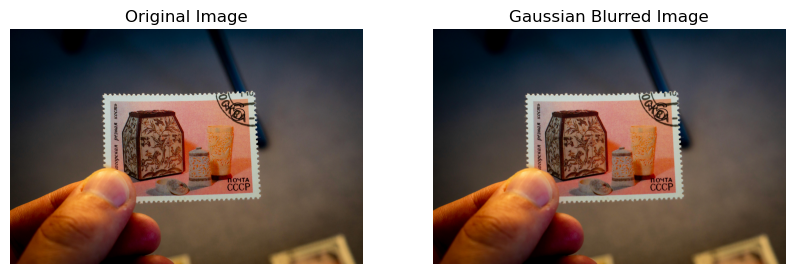

In [1]:
#GAUSSIAN BLUR

import cv2
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('a.jpg')

# Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(image, (15, 15), 0)

# Convert BGR to RGB for displaying with matplotlib
blurred_image_rgb = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB)

# Display the original and blurred images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image_rgb)
plt.title('Gaussian Blurred Image')
plt.axis('off')

plt.show()


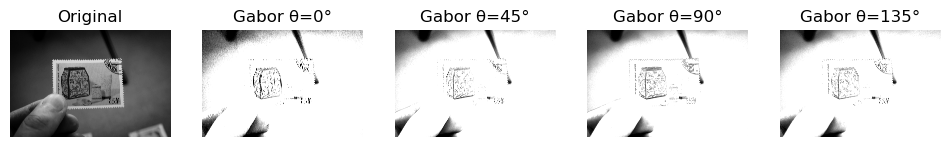

In [1]:
#GABOR FILTERS

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('a.jpg', cv2.IMREAD_GRAYSCALE)

# Parameters for Gabor filters
ksize = 31  # Size of the filter
sigma = 4.0  # Standard deviation of the Gaussian function
lambd = 10.0  # Wavelength of the sinusoidal factor
gamma = 0.5  # Spatial aspect ratio
psi = 0  # Phase offset

# Create different Gabor filters by varying theta (orientation)
filtered_images = []
orientations = [0, 45, 90, 135]  # Orientations in degrees

for theta in orientations:
    theta_rad = theta * np.pi / 180  # Convert to radians
    gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta_rad, lambd, gamma, psi, ktype=cv2.CV_32F)
    filtered_img = cv2.filter2D(image, cv2.CV_8UC3, gabor_kernel)
    filtered_images.append(filtered_img)

# Display the original and filtered images
plt.figure(figsize=(12, 6))
plt.subplot(1, len(filtered_images) + 1, 1)
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis('off')

for i, filtered_img in enumerate(filtered_images):
    plt.subplot(1, len(filtered_images) + 1, i + 2)
    plt.imshow(filtered_img, cmap='gray')
    plt.title(f"Gabor θ={orientations[i]}°")
    plt.axis('off')

plt.show()


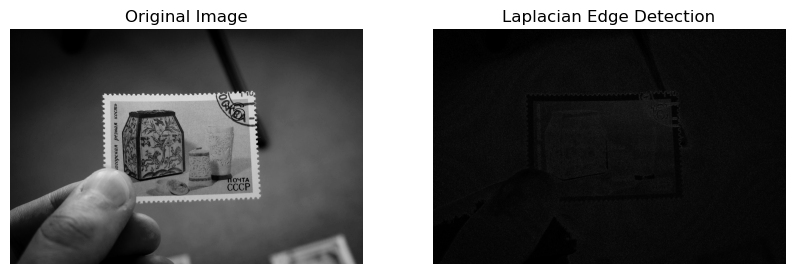

In [5]:
#Laplacian edge detection
import cv2
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('a.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Laplacian edge detection
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Convert back to uint8
laplacian = cv2.convertScaleAbs(laplacian)

# Display the original and edge-detected images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')

plt.show()

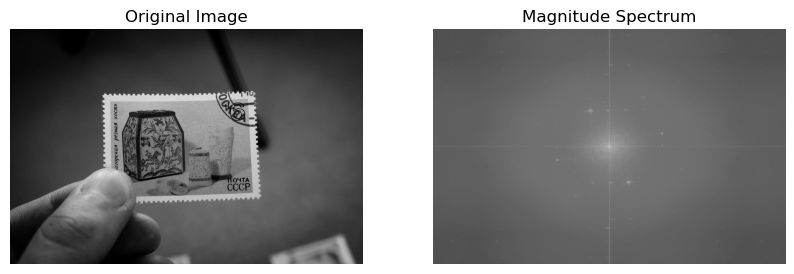

In [1]:
#magnitude spectrum
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('a.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Fourier Transform
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)  # Shift zero frequency component to the center

# Compute the magnitude spectrum
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)

# Display the original image and its magnitude spectrum
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis('off')
plt.show()


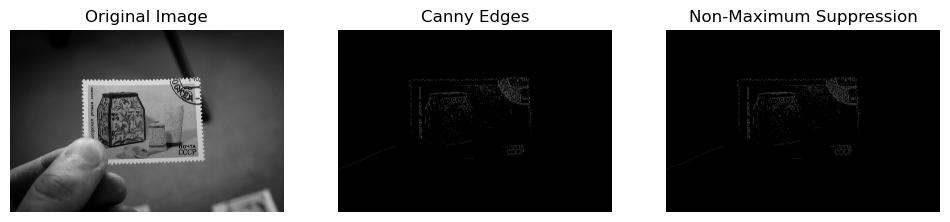

In [3]:
#NON MAXIMUM SUPPRESSION

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('a.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detection
low_threshold = 100
high_threshold = 200
edges = cv2.Canny(image, low_threshold, high_threshold)

# Perform Non-Maximum Suppression
def non_maximum_suppression(edges):
    # Create an output image to hold the results
    nms_image = np.zeros(edges.shape, dtype=np.uint8)

    # Get the gradient direction
    gradient_x = cv2.Sobel(edges, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(edges, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.hypot(gradient_x, gradient_y)
    gradient_direction = np.arctan2(gradient_y, gradient_x) * (180.0 / np.pi) % 180

    # Iterate over the image to apply non-maximum suppression
    for i in range(1, edges.shape[0] - 1):
        for j in range(1, edges.shape[1] - 1):
            angle = gradient_direction[i, j]
            q = 255
            r = 255
            
            # Adjust the direction of the angle to 0, 45, 90, or 135
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                q = gradient_magnitude[i, j + 1]
                r = gradient_magnitude[i, j - 1]
            elif (22.5 <= angle < 67.5):
                q = gradient_magnitude[i + 1, j - 1]
                r = gradient_magnitude[i - 1, j + 1]
            elif (67.5 <= angle < 112.5):
                q = gradient_magnitude[i + 1, j]
                r = gradient_magnitude[i - 1, j]
            elif (112.5 <= angle < 157.5):
                q = gradient_magnitude[i - 1, j - 1]
                r = gradient_magnitude[i + 1, j + 1]

            # Suppress non-maximum pixels
            if (gradient_magnitude[i, j] >= q) and (gradient_magnitude[i, j] >= r):
                nms_image[i, j] = gradient_magnitude[i, j]
    
    return nms_image

# Apply Non-Maximum Suppression
nms_result = non_maximum_suppression(edges)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edges")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(nms_result, cmap='gray')
plt.title("Non-Maximum Suppression")
plt.axis('off')

plt.show()
